In [68]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import sklearn
import os
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [54]:
data = pd.read_csv("Classification_Diabetes_Dataset.csv")
data.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
#selecting test + train data
x = data.drop(['Outcome'], axis =1)
y = data.Outcome.values


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)


In [79]:
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [60]:
#Linear Discriminant Analysis
gradient = LinearDiscriminantAnalysis()
gradient.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
#check performance on test data
predictions = gradient.predict(x_test)

In [69]:
# compare predictions to the known values (y_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

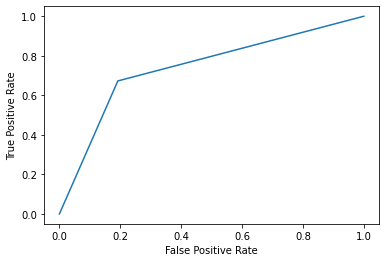

accuracy: 0.7597402597402597


<AxesSubplot:>

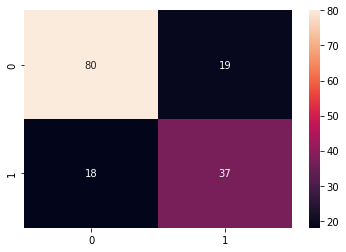

In [70]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('accuracy:', metrics.accuracy_score(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

In [71]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [72]:
gradient = MultinomialNB()

In [73]:
gradient.fit(x_train, y_train)

MultinomialNB()

In [74]:
from sklearn.metrics import confusion_matrix, classification_report


In [76]:
# check the model's performance on test data
predictions = gradient.predict(x_test)

In [77]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

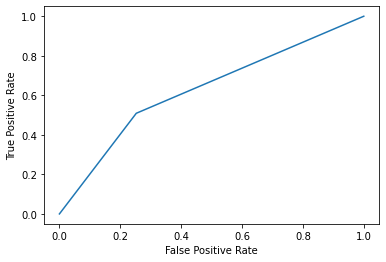

accuracy: 0.6623376623376623


<AxesSubplot:>

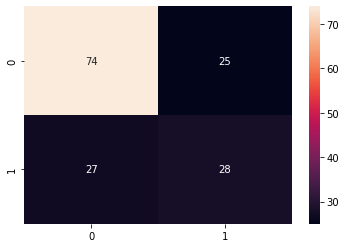

In [78]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('accuracy:', metrics.accuracy_score(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

In [80]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBmodel=GaussianNB()


In [81]:
NBmodel.fit(x_train, np.ravel(y_train))


GaussianNB()

In [83]:
#testing results
names1 = []
names1.append("Naive Bayes")
scores1 = []
nb_accuracy = NBmodel.score(x_test,np.ravel(y_test))*100
scores1.append(nb_accuracy)
print("Naive Bayes Model Accuracy: ",nb_accuracy)

Naive Bayes Model Accuracy:  76.62337662337663


In [85]:
#Confusion matrix
y_pred = NBmodel.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[79 20]
 [16 39]]
